<h1 align='center'>Image Process</h1>
<h1 align='center'>Đỗ Trọng Khánh - 19521676</h1>

# Dò tìm các feature của khuôn mặt: mắt, mũi, miệng của khuôn mặt.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import cv2
import os
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import imutils
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Improt model
eye_cascade = cv2.CascadeClassifier('/content/gdrive/MyDrive/Colab Notebooks/Computer Vision/Week 1/haarcascade_eye.xml')
mouth_cascade = cv2.CascadeClassifier('/content/haarcascade_mcs_mouth.xml')
nose_cascade = cv2.CascadeClassifier('/content/haarcascade_mcs_nose.xml')

In [4]:
image = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/Computer Vision/Week 1/Image/PrisionBreak.png')
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2BGRA)

eyes = eye_cascade.detectMultiScale(gray_img)
mouth = mouth_cascade.detectMultiScale(gray_img)
nose = nose_cascade.detectMultiScale(gray_img)

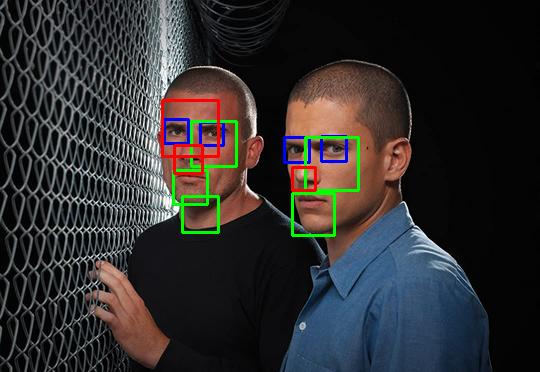

In [5]:
for (x, y, w, h) in eyes:
  cv2.rectangle(image, (x,y), (x+w, y+w), (255, 0, 0), 2)
  
for (x, y, w, h) in mouth:
    cv2.rectangle(image, (x,y), (x+w, y+w), (0, 255, 0), 2)

for (x, y, w, h) in nose:
    cv2.rectangle(image, (x,y), (x+w, y+w), (0, 0, 255), 2)

cv2_imshow(image)

# Body full, upper, lower

## Image

In [6]:
full_body_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_fullbody.xml')
upper_body_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_upperbody.xml')
lower_body_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_lowerbody.xml')

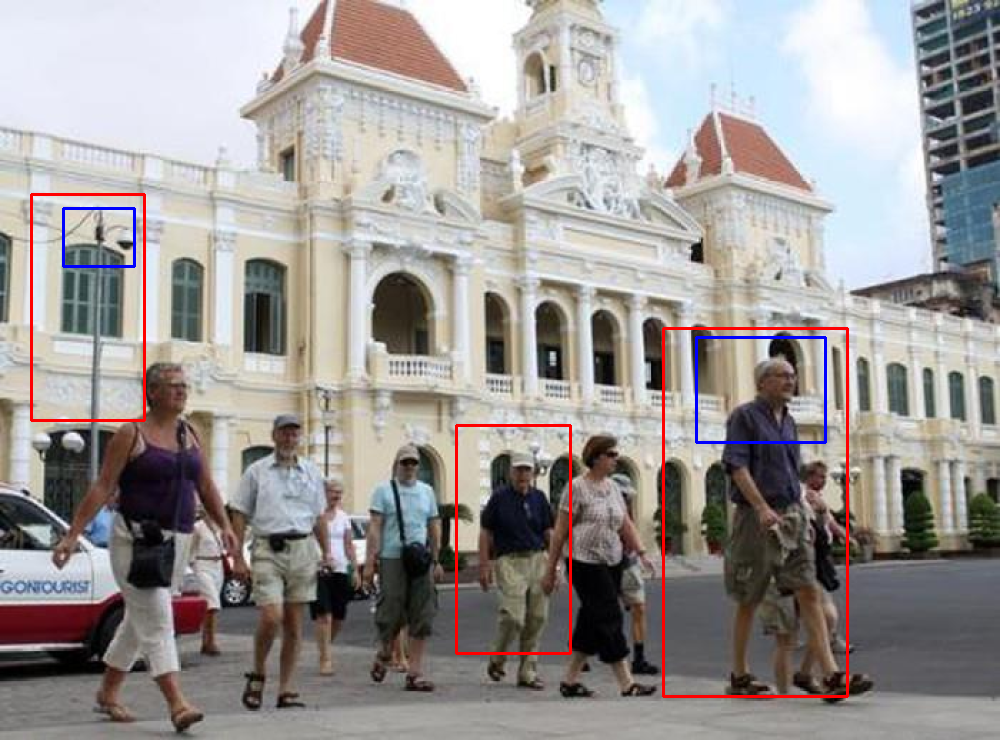

In [7]:
img = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/Computer Vision/Week 1/Image/people.jpeg')
img = imutils.resize(img, width=1000)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

bodys = full_body_cascade.detectMultiScale(gray, 1.05, 5, minSize=(100, 200), flags = cv2.CASCADE_SCALE_IMAGE)

for (x,y,w,h) in bodys:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    
    upper = upper_body_cascade.detectMultiScale(roi_gray)
    lower = lower_body_cascade.detectMultiScale(roi_gray)
    
    for (ux,uy,uw,uh) in upper:
        cv2.rectangle(roi_color, (ux, uy), (ux+uw, uy+uh), (255, 0, 0), 2)
    for (lx,ly,lw,lh) in lower:
        cv2.rectangle(roi_color, (lx, ly), (lx+lw, ly+lh), (0, 255, 0), 2)

cv2_imshow(img) 

## Video

In [ ]:
video_capture = cv2.VideoCapture("/content/gdrive/MyDrive/Colab Notebooks/Computer Vision/Week 1/Image/vtest.avi")
video_width = video_capture.get(3)
video_height = video_capture.get(4)

while True:
    ret, frame = video_capture.read()
    
    if ret == False:
        break

    frame = imutils.resize(frame, width=1000) 
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    full = lower_body_cascade.detectMultiScale(
        gray,
        scaleFactor = 1.1,
        minNeighbors = 5,
        minSize = (50, 100), 
        flags = cv2.CASCADE_SCALE_IMAGE
    )

    for (x, y, w, h) in full:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 1)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]

        upper = upper_body_cascade.detectMultiScale(roi_gray)
        lower = lower_body_cascade.detectMultiScale(roi_gray)

        for (ux,uy,uw,uh) in upper:
            cv2.rectangle(roi_color, (ux, uy), (ux+uw, uy+uh), (255, 0, 0), 2)
        for (lx,ly,lw,lh) in lower:
            cv2.rectangle(roi_color, (lx, ly), (lx+lw, ly+lh), (0, 255, 0), 2)
        
    cv2_imshow(frame)

# Dò tìm car trong ảnh

In [8]:
cars_cascade = cv2.CascadeClassifier('/content/gdrive/MyDrive/Colab Notebooks/Computer Vision//Week 1/cars.xml')

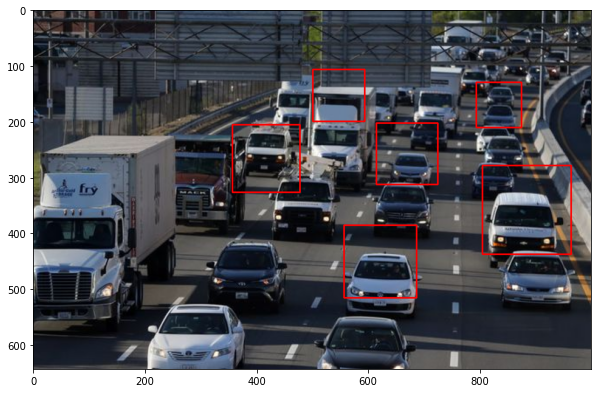

In [9]:
img = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/Computer Vision/Week 1/Image/vehicle.jpeg')
img = imutils.resize(img, width=1000)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cars = cars_cascade.detectMultiScale(gray, 1.05, 5, minSize=(60, 60), flags = cv2.CASCADE_SCALE_IMAGE)

for (x,y,w,h) in cars:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
    

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(img)   